In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [18]:
df = pd.read_csv('btc_5years.csv', skiprows=3, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [20]:
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

In [21]:
df.dropna(inplace=True)

In [22]:
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)

In [23]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Next_Close']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Model Performance:
Mean Squared Error: 4051542.04
R-squared: 0.9888


C:\Users\win10\AppData\Local\Temp\ipykernel_13004\429068837.py:3: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  results_subset = results_df.last('1M')
C:\Users\win10\AppData\Local\Temp\ipykernel_13004\429068837.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  results_subset = results_df.last('1M')


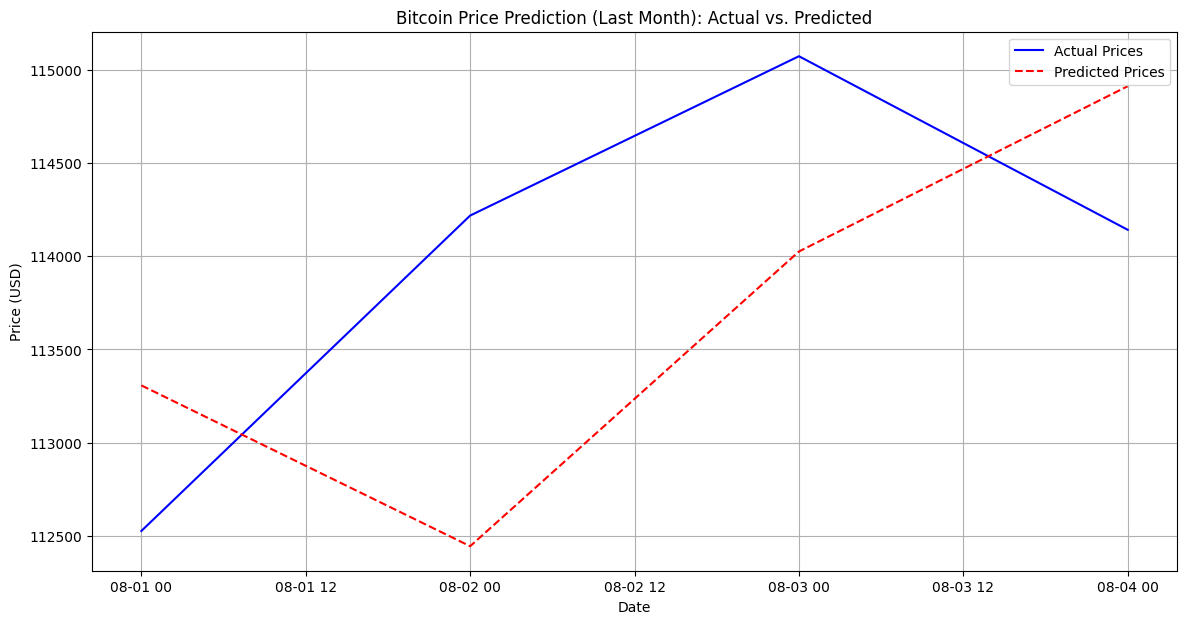

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results_subset = results_df.last('1M')


plt.figure(figsize=(14, 7))
plt.plot(results_subset.index, results_subset['Actual'], label='Actual Prices', color='blue')
plt.plot(results_subset.index, results_subset['Predicted'], label='Predicted Prices', color='red', linestyle='--')
plt.title('Bitcoin Price Prediction (Last Month): Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()